### Persiapan

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Membaca dataset
data_raw = pd.read_csv("heart.csv")

data_raw = data_raw[(data_raw["Cholesterol"] != 0) & (data_raw["RestingBP"] != 0)]

data_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data = np.array(data_raw)
data = data[:, [0, 3, 4, 7]]

atribute = ["Age", "RestingBP", "Cholesterol", "MaxHR"]

kolom_valid_untuk_tampil = [kol for kol in atribute if kol in data_raw.columns]
kolom_tidak_ada = [kol for kol in atribute if kol not in data_raw.columns]

if kolom_tidak_ada:
    print(f"\nKolom berikut tidak ditemukan di data mentah: {kolom_tidak_ada}")

if kolom_valid_untuk_tampil:
    print(f"\nMenampilkan {len(kolom_valid_untuk_tampil)} atribut yang dipilih dari data mentah:")
    print(data_raw[kolom_valid_untuk_tampil])
else:
    print("\nTidak ada kolom valid yang bisa ditampilkan dari daftar yang Anda minta.")


Menampilkan 4 atribut yang dipilih dari data mentah:
     Age  RestingBP  Cholesterol  MaxHR
0     40        140          289    172
1     49        160          180    156
2     37        130          283     98
3     48        138          214    108
4     54        150          195    122
..   ...        ...          ...    ...
913   45        110          264    132
914   68        144          193    141
915   57        130          131    115
916   57        130          236    174
917   38        138          175    173

[746 rows x 4 columns]


In [4]:
# Rentang umur
min_age = np.min(data[:, 0])
max_age = np.max(data[:, 0])
print("Rentang umur: ")
print(f"Min: {min_age}")
print(f"Max: {max_age}")
print()

# Rentang RestingBP
min_rbp = np.min(data[:, 1])
max_rbp = np.max(data[:, 1])
print("Rentang restingBP: ")
print(f"Min: {min_rbp}")
print(f"Max: {max_rbp}")
print()

# Rentang kadar kolesterol
min_kol = np.min(data[:, 2])
max_kol = np.max(data[:, 2])
print("Rentang kadar kolesterol: ")
print(f"Min: {min_kol}")
print(f"Max: {max_kol}")
print()

# Rentang maximum heart rate
min_mhr = np.min(data[:, 3])
max_mhr = np.max(data[:, 3])
print("Rentang maximum heart rate: ")
print(f"Min: {min_mhr}")
print(f"Max: {max_mhr}")

Rentang umur: 
Min: 28
Max: 77

Rentang restingBP: 
Min: 92
Max: 200

Rentang kadar kolesterol: 
Min: 85
Max: 603

Rentang maximum heart rate: 
Min: 69
Max: 202


### Input 

In [10]:
inp_age = input("Masukkan umur: ")
inp_rbp = input("Masukkan restingBP: ")
inp_kol = input("Masukkan kolesterol: ")
inp_mhr = input("Masukkan maximumHR: ")

Masukkan umur:  a
Masukkan restingBP:  a
Masukkan kolesterol:  a
Masukkan maximumHR:  a


### Proses Fuzzification

In [11]:
#Fuzzification
age = np.arange(0, 96, 1)
rbp = np.arange(0, 201, 1)
kol = np.arange(0, 701, 1)
mhr = np.arange(0, 201, 1)

In [17]:
# Age (0 to 98)
age_muda = np.array([max(0, min(1, (35 - i) / (35 - 18))) for i in age])
age_paruh_baya = np.array([max(0, min(1, (i - 18) / (35 - 18), (56 - i) / (56 - 35))) for i in age])
age_tua = np.array([max(0, min(1, (i - 65) / (98 - 65))) for i in age])

# Resting BP (0 to 200)
rbp_low = np.array([max(0, min(1, (80 - i) / 80)) for i in rbp])
rbp_medium = np.array([max(0, min(1, (i - 0) / 80, (120 - i) / 40)) for i in rbp])
rbp_high = np.array([max(0, min(1, (i - 80) / 120)) for i in rbp])

# Cholesterol (0 to 700)
kol_low = np.array([max(0, min(1, (150 - i) / 150)) for i in kol])
kol_medium = np.array([max(0, min(1, (i - 0) / 150, (250 - i) / 100)) for i in kol])
kol_high = np.array([max(0, min(1, (i - 150) / 100, (700 - i) / 450)) for i in kol])

# MaxHR (0 to 250)
mhr_low = np.array([max(0, min(1, (100 - i) / 100)) for i in mhr])
mhr_medium = np.array([max(0, min(1, (i - 0) / 100, (150 - i) / 50)) for i in mhr])
mhr_high = np.array([max(0, min(1, (i - 100) / 150)) for i in mhr])

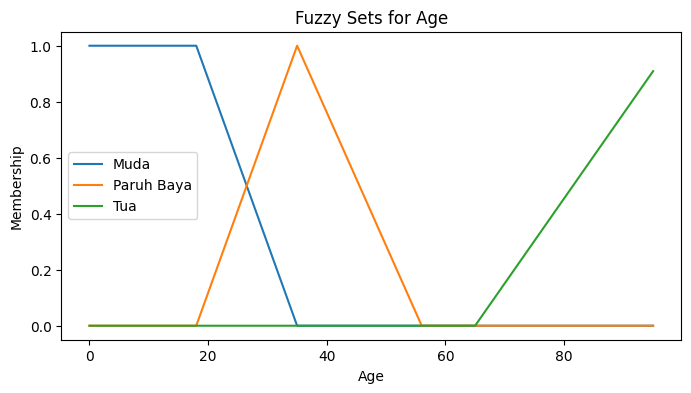

In [18]:
# Age Fuzzy Sets
fig = plt.figure(figsize=(8,4))
plt.plot(age, age_muda, label='Muda')
plt.plot(age, age_paruh_baya, label='Paruh Baya')
plt.plot(age, age_tua, label='Tua')
plt.title('Fuzzy Sets for Age')
plt.xlabel('Age')
plt.ylabel('Membership')
plt.legend()

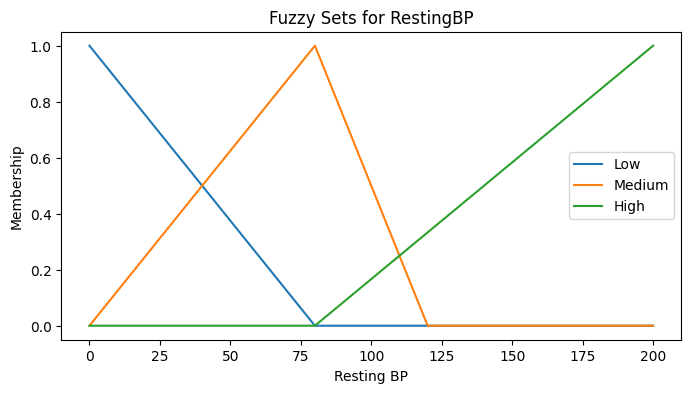

In [14]:
# RestingBP Fuzzy Sets
fig = plt.figure(figsize=(8,4))
plt.plot(rbp, rbp_low, label='Low')
plt.plot(rbp, rbp_medium, label='Medium')
plt.plot(rbp, rbp_high, label='High')
plt.title('Fuzzy Sets for RestingBP')
plt.xlabel('Resting BP')
plt.ylabel('Membership')
plt.legend()

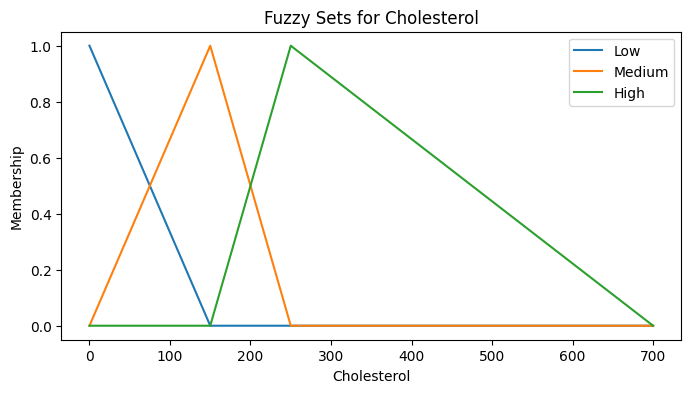

In [15]:
# Cholesterol Fuzzy Sets
fig = plt.figure(figsize=(8,4))
plt.plot(kol, kol_low, label='Low')
plt.plot(kol, kol_medium, label='Medium')
plt.plot(kol, kol_high, label='High')
plt.title('Fuzzy Sets for Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Membership')
plt.legend()

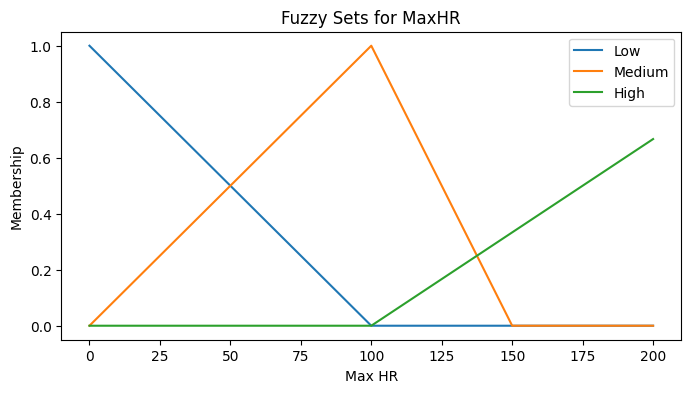

In [16]:
# MaxHR Fuzzy Sets
fig = plt.figure(figsize=(8,4))
plt.plot(mhr, mhr_low, label='Low')
plt.plot(mhr, mhr_medium, label='Medium')
plt.plot(mhr, mhr_high, label='High')
plt.title('Fuzzy Sets for MaxHR')
plt.xlabel('Max HR')
plt.ylabel('Membership')
plt.legend()

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>